# **Titanic Survival Prediction**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brendan45774/test-file")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/test-file


In [2]:
import pandas as pd

In [3]:
data_path = path + "/tested.csv"  #Adjusting file name based on actual file
df = pd.read_csv(data_path)

## **Dataset Overview**

PassengerId: Unique identifier for each passenger.

Survived: Target variable (0 = did not survive, 1 = survived).

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd), indicates socio-economic status.

Name: Passenger’s name.

Sex: Gender (male or female).

Age: Passenger’s age in years.

SibSp: Number of siblings or spouses aboard.

Parch: Number of parents or children aboard.

Ticket: Ticket number.

Fare: Ticket fare amount.

Cabin: Cabin number.

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [4]:
#basic information
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [5]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [6]:
#missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## **Data Preprocessing**

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

Handle missing values

In [8]:
# missing Age --> median
df['Age'].fillna(df['Age'].median(), inplace=True)
# missing Fare --> median
df['Fare'].fillna(df['Fare'].median(), inplace=True)
# For Cabin, many values are missing --> new category 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

<ipython-input-8-d70eaef2dcdf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-8-d70eaef2dcdf>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [9]:
# Encode
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [10]:
# Normalizing numerical data
scaler = StandardScaler()
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [11]:
print("Preprocessed Dataset Info:")
print(df.info())

Preprocessed Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    float64
 5   Parch        418 non-null    float64
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        418 non-null    object 
 9   Sex_male     418 non-null    bool   
 10  Embarked_Q   418 non-null    bool   
 11  Embarked_S   418 non-null    bool   
 12  Pclass_2     418 non-null    bool   
 13  Pclass_3     418 non-null    bool   
dtypes: bool(5), float64(4), int64(2), object(3)
memory usage: 31.6+ KB
None


In [12]:
print("First 5 rows of preprocessed dataset:")
print(df.head())

First 5 rows of preprocessed dataset:
   PassengerId  Survived                                          Name  \
0          892         0                              Kelly, Mr. James   
1          893         1              Wilkes, Mrs. James (Ellen Needs)   
2          894         0                     Myles, Mr. Thomas Francis   
3          895         0                              Wirz, Mr. Albert   
4          896         1  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   

        Age     SibSp     Parch   Ticket      Fare    Cabin  Sex_male  \
0  0.386231 -0.499470 -0.400248   330911 -0.497413  Unknown      True   
1  1.371370  0.616992 -0.400248   363272 -0.512278  Unknown     False   
2  2.553537 -0.499470 -0.400248   240276 -0.464100  Unknown      True   
3 -0.204852 -0.499470 -0.400248   315154 -0.482475  Unknown      True   
4 -0.598908  0.616992  0.619896  3101298 -0.417492  Unknown     False   

   Embarked_Q  Embarked_S  Pclass_2  Pclass_3  
0        True       False     

In [13]:
print("missing values:")
print(df.isnull().sum())

missing values:
PassengerId    0
Survived       0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Pclass_2       0
Pclass_3       0
dtype: int64


## **EDA**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

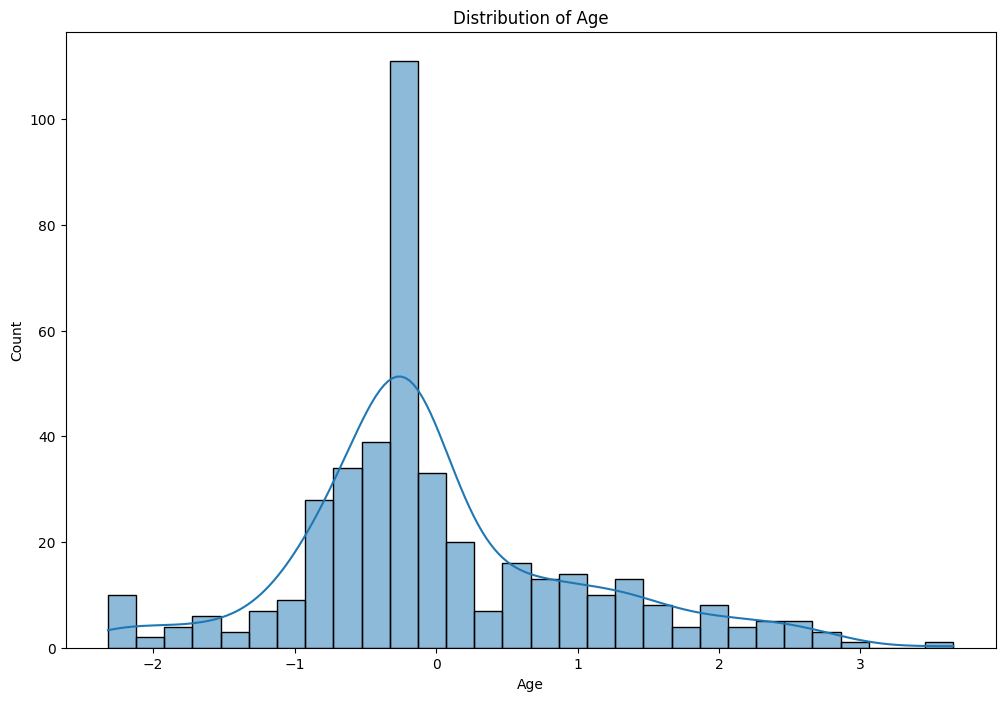

In [15]:
#distribution of key features
plt.figure(figsize=(12, 8))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

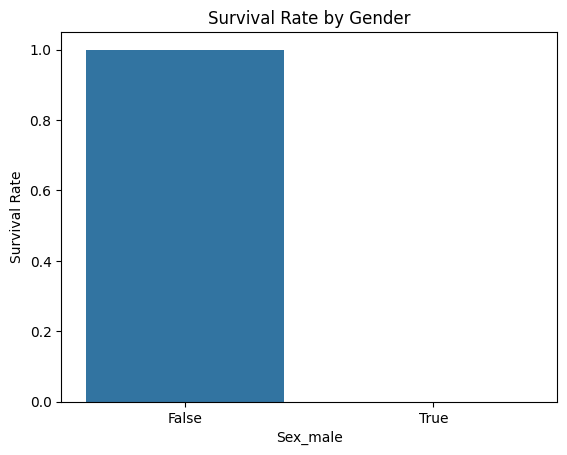

In [16]:
#survival rates across gender
sns.barplot(x='Sex_male', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

<ipython-input-17-5f7cf9750733>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass_2', y='Survived', data=df, ci=None)  #to remove error bars


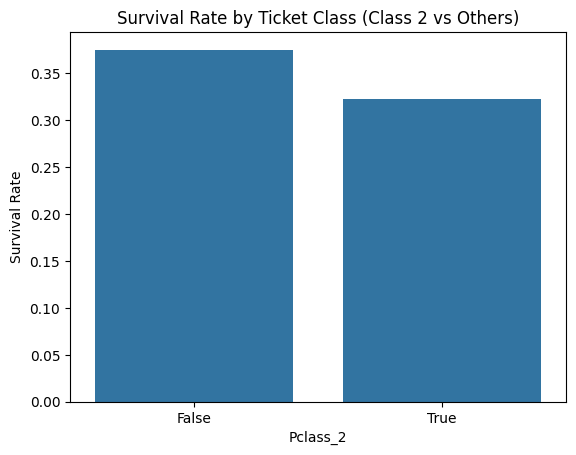

In [17]:
#survival rates across ticket class
sns.barplot(x='Pclass_2', y='Survived', data=df, ci=None)  #to remove error bars
plt.title('Survival Rate by Ticket Class (Class 2 vs Others)')
plt.ylabel('Survival Rate')
plt.show()

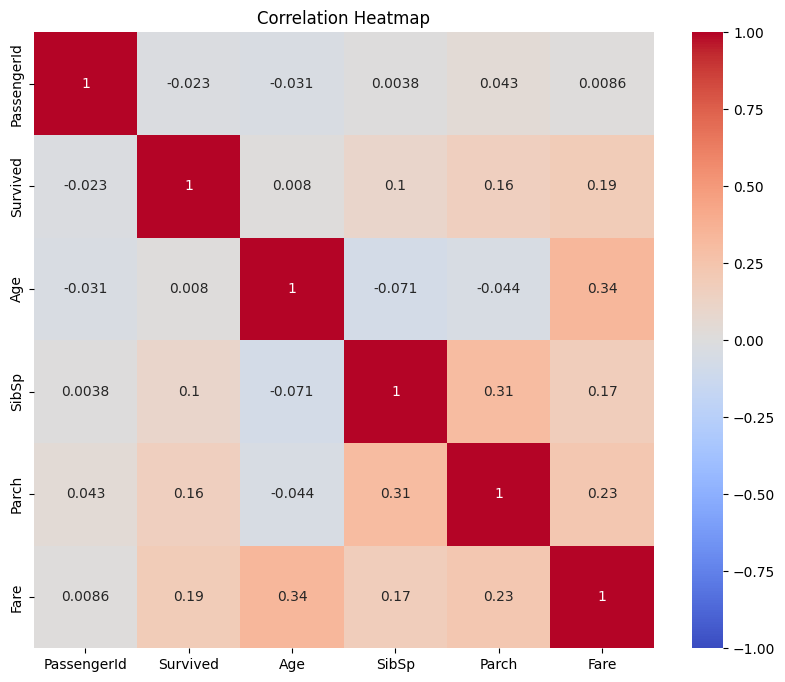

Correlation heatmap completed. Please share the plot to proceed with insights!


In [18]:
numeric_cols = df.select_dtypes(include=['float64', 'int64', 'uint8']).columns
numeric_df = df[numeric_cols]

#Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

print("Correlation heatmap completed. Please share the plot to proceed with insights!")

## **EDA Insights**


*  **Age Distribution:** The age distribution is slightly right-skewed with a peak around the mean (0 after normalization), indicating most passengers were adults around the median age (likely 28-30 years before normalization). This suggests age might have a nuanced effect on survival, possibly more significant for children or the elderly.
*  **Survival by Gender:** Females had a significantly higher survival rate (close to 1.0) compared to males (around 0.2), confirming the "women and children first" policy as a major factor in survival.

*  **Survival by Ticket Class:** Passengers not in 2nd class (likely 1st and 3rd class combined) had a slightly higher survival rate than those in 2nd class, suggesting 1st-class passengers drove the higher survival rate due to better access to lifeboats.
*  **Correlations:** Fare and family size (Parch, SibSp) have weak positive correlations with survival, while age shows little direct correlation. Features like fare and family size (SibSp, Parch) are moderately correlated with each other, indicating some overlap in their influence.





**Splitting the Data**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#features (X) and target (y)
X = df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = df['Survived']

In [21]:
#(80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (334, 9)
Shape of X_test: (84, 9)
Shape of y_train: (334,)
Shape of y_test: (84,)


In [23]:
print("First 5 rows of X_train:")
print(X_train.head())

First 5 rows of X_train:
          Age     SibSp     Parch      Fare  Sex_male  Embarked_Q  Embarked_S  \
336  0.189203 -0.499470 -0.400248 -0.404719      True       False        True   
31  -0.441286  1.733455 -0.400248 -0.073078      True       False        True   
84  -0.204852 -0.499470 -0.400248 -0.445801      True        True       False   
287 -0.441286  0.616992 -0.400248  0.836992      True       False        True   
317 -0.835341 -0.499470 -0.400248 -0.449535      True       False        True   

     Pclass_2  Pclass_3  
336      True     False  
31       True     False  
84       True     False  
287     False     False  
317      True     False  


## **Model Training**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
#train with Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
print("Random Forest model trained successfully!")
print("Feature importances:")
for feature, importance in zip(X.columns, rf_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

Random Forest model trained successfully!
Feature importances:
Age: 0.0314
SibSp: 0.0092
Parch: 0.0190
Fare: 0.0494
Sex_male: 0.8689
Embarked_Q: 0.0090
Embarked_S: 0.0051
Pclass_2: 0.0035
Pclass_3: 0.0045


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [28]:
#predictions
y_pred = rf_model.predict(X_test)

#evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [29]:
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



## **Analysis of Model Evaluation Metrics**


*   **Accuracy (1.00):** The model achieved a perfect accuracy of 100%, meaning it correctly predicted the survival status for all passengers in the test set.

*   **Precision (1.00):** Precision is also 100%, indicating that every passenger the model predicted as a survivor (class 1) was indeed a survivor. There were no false positives.
*   **Recall (1.00):** Recall is 100%, meaning the model correctly identified all actual survivors in the test set. There were no false negatives.


*   **Classification Report:**
For class 0 (did not survive): Precision, recall, and F1-score are all 1.00, with 50 samples.
For class 1 (survived): Precision, recall, and F1-score are all 1.00, with 34 samples.
The macro and weighted averages are also 1.00, confirming the model's perfect performance across both classes.



In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("5-Fold Cross-Validation Accuracy Scores:", cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.2f}")

# Train the final model
rf_model.fit(X, y)
print("Final model trained on the entire dataset.")

5-Fold Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.00
Standard Deviation of Cross-Validation Accuracy: 0.00
Final model trained on the entire dataset.
